### Problem 2.1

In [38]:
import itertools

# Our numerical workhorses
import numpy as np
import pandas as pd
import scipy.integrate

# Import Altair for high level plotting
import altair as alt
import altair_catplot as altcat

# Import Bokeh modules for interactive plotting
import bokeh.io
import bokeh.plotting
import bebi103

# Set up Bokeh for inline viewing
bokeh.io.output_notebook()

# Pevent bulky altair plots
alt.data_transformers.enable('json')

Loading BokehJS ...

DataTransformerRegistry.enable('json')

a) Load the data into a Pandas DataFrame using pd.read_excel(). That's right, Pandas can read Excel files! You might want to read the Pandas documentation to see how it works.

In [39]:
# Load the data into DataFrame df
df = pd.read_excel('../data/wang_cool_gal4.xlsx')

In [40]:
# Check the data
df.head()

,sc15,sc20,sc25,sk15,sk20,sk25,m315,m320,m325
0,1298.547,2737.135,16499.30,8978.031,14251.97,16593.960,20722.62,11703.01,17073.800
1,6798.146,12185.360,12672.19,11221.130,13616.94,6910.673,10373.52,17025.58,15379.370
2,10686.910,1532.901,15832.53,9460.200,17474.90,20934.660,21707.12,17499.83,16991.490
3,2018.864,2357.752,15065.03,9049.072,16042.57,18042.750,21750.27,15657.50,13393.350
4,1551.396,1888.596,16960.67,14132.810,12867.40,23189.560,20820.26,11383.33,7709.297


This DataFrame is obviously untidy, what we need to do is separate the system information (i.e. SC, SK, m3) from the temperature information (i.e. 15, 20, 25). Our final DataFrame should have a system column and a column for each temperature.

b) Tidy the DataFrame. Be sure to remove any NaNs.

In [72]:
df_tidy = df.stack(level=0)
df_tidy = df_tidy.sort_index(level=1)
df_tidy = df_tidy.reset_index(level=1)
df_tidy['Temperature'] = df_tidy.level_1.str[2:4]
df_tidy.level_1 = df_tidy.level_1.str[:2]
df_tidy = df_tidy.rename(columns={'level_1': 'Condition', 0:'GFP fluorescence signal'})
df_tidy = df_tidy[['Condition','Temperature','GFP fluorescence signal']]
df_tidy = df_tidy.replace({'sc':'SC (orignal Gal4)', 'sk':'SK (cool Gal4)', 
                           'm3':'m3 Pmyo-3::GFP fusion (control)'})
df_tidy = df_tidy.dropna()
df_tidy = df_tidy.reset_index()

In [73]:
# This is not done but I'm stopping now
df_tidy

,index,Condition,Temperature,GFP fluorescence signal
0,0,SC (orignal Gal4),15,1298.5470
1,1,SC (orignal Gal4),15,6798.1460
2,2,SC (orignal Gal4),15,10686.9100
3,3,SC (orignal Gal4),15,2018.8640
4,4,SC (orignal Gal4),15,1551.3960
5,5,SC (orignal Gal4),15,1682.3060
6,6,SC (orignal Gal4),15,5801.6910
7,7,SC (orignal Gal4),15,3485.5570
8,8,SC (orignal Gal4),15,5701.0430
9,9,SC (orignal Gal4),15,2584.7330


c) Do some exploratory data analysis of the data set. That is, make some instructive plots. Discuss why you chose to visualize the data set the way(s) you did. What can you say about Han's cool Gal4 just by looking at the plots?

We will try to plot an ECDF plot. Attempting to do this in one function using altcat yields an incorrect graph, where the ECDF's are computed for all the values for one Condition and then split into three graphs based on temperature. We will attempt instead to do three plots and show them side by side.

In [74]:
T15 = df_tidy['Temperature'] == '15'
T20 = df_tidy['Temperature'] == '20'
T25 = df_tidy['Temperature'] == '25'

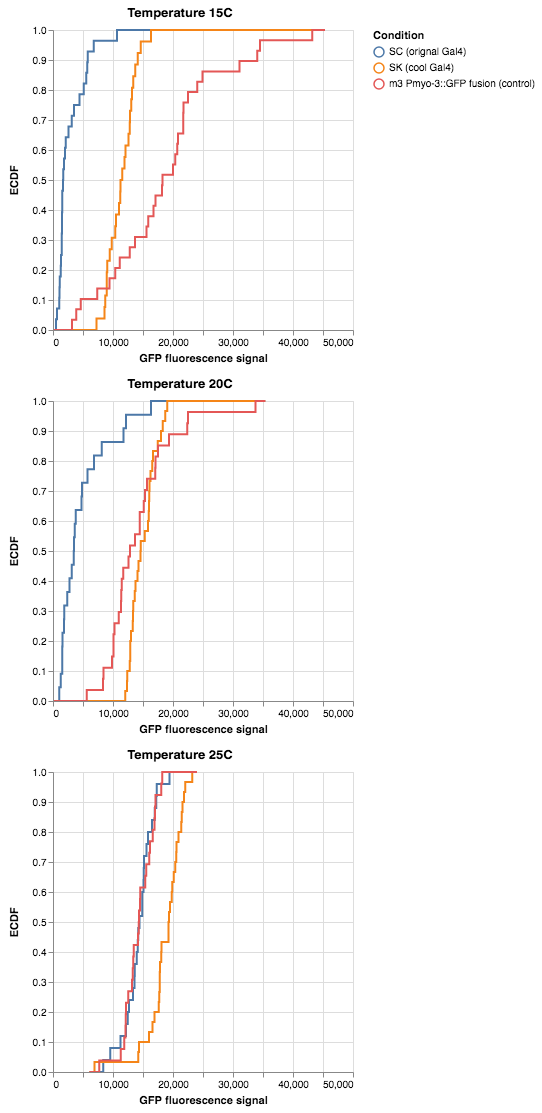

In [85]:
Chart15 = altcat.catplot(data=df_tidy.loc[T15,:],
               mark='line',
               encoding=dict(x=alt.X('GFP fluorescence signal:Q',
                                     scale=alt.Scale(
                                           domain=(0, 50000),
                                           clamp=True
                                     )
                             ),
                             color = alt.Color('Condition:N', title='Condition')
                        ),
               transform='ecdf'
              ).properties(height=300,
                           width=300,
                            title = 'Temperature 15C'
              )
Chart20 = altcat.catplot(data=df_tidy.loc[T20,:],
               mark='line',
               encoding=dict(x=alt.X('GFP fluorescence signal:Q',
                                     scale=alt.Scale(
                                           domain=(0, 50000),
                                           clamp=True
                                     )
                             ),
                             color = alt.Color('Condition:N', title='Condition')
                        ),
               transform='ecdf'
              ).properties(height=300,
                           width=300,
                           title = 'Temperature 20C'
                           
              )
Chart25 = altcat.catplot(data=df_tidy.loc[T25,:],
               mark='line',
               encoding=dict(x=alt.X('GFP fluorescence signal:Q',
                                     scale=alt.Scale(
                                           domain=(0, 50000),
                                           clamp=True
                                     )
                             ),
                             color = alt.Color('Condition:N', title='Condition'),
                        ),
               transform='ecdf'
              ).properties(height=300,
                           width=300,
                           title = 'Temperature 25C'
              )
Chart15 & Chart20 & Chart25

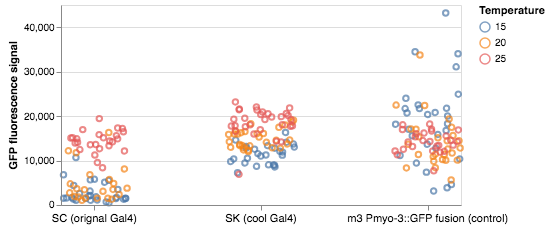

In [78]:
altcat.catplot(data=df_tidy,
               mark='point',
               encoding=dict(y=alt.Y('GFP fluorescence signal:Q'
                             ),
                             x='Condition:N',
                             color = alt.Color('Temperature:N', title='Temperature')
                        ),
               transform='jitter'
              ).properties(height=200,
                           width=400
              )